In [1]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from random import randint
from collections import Counter 
import collections
import statistics
import time
from itertools import chain 
import random
import operator
import copy
import networkx as nx

import no_nx_functions as f
import nx_functions as nx_f

### Importing and exploring data 

In [2]:
dataset = pd.read_csv('wikigraph_reduced.csv', sep='\t', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1")

In [3]:
dataset.columns=['Index','Source','Target']

In [4]:
# check if index columns has unique values
print(len(dataset.Index))
print(len(set(dataset.Index)))

483094
483094


In [5]:
dataset.set_index('Index' , inplace = True)
dataset.head()

,Source,Target
Index,,
796,95,1185516
909,108,1059989
910,108,1062426
911,108,1161925
1141,134,541222


#### Associate single category to each node

- categories_all = dictionary of nodes (K) with all associated categories (Values)
- nodes_category = dictionary of nodes (K) with just one category (Values)
- category_nodes = dictionary of categories (K) with all associated nodes (Values)

In [6]:
# all nodes in and out
unique_nodes = set(set(dataset.Source).union(set(dataset.Target)))
n_nodes = len(unique_nodes)
n_edges = len(dataset)

In [7]:
category_file = 'wiki-topcats-categories.txt'

Non filtered categories

In [8]:
categories_all = {v: [] for v in unique_nodes}
no_category = []

with open(category_file) as file:
    for i in range(17364):
        line = file.readline()
        category = line.split(';')[0].split(':')[-1]
        nodes = line.split(';')[1].split(' ')[1:-2]
        
        for node in nodes:
            try:
                categories_all[int(node)].append(category)
            except:
                no_category.append(int(node))

Filtering categories
    1. Take the list of categories by a node
    2. Choose one random category
    3. If node have no category --> None

In [9]:
nodes_category = {}
for n in categories_all.keys():
    try:
        random.seed(42)
        rand_category = random.choice(categories_all[n])
        nodes_category[n] = rand_category
    except:
        nodes_category[n] = None

In [10]:
category_nodes = {category:[] for category in set(nodes_category.values())}
for node in nodes_category.keys():
    try:
        category_nodes[nodes_category[node]].append(node)
    except:
        continue

#### Create graph
- in_link = dictionary with all inlinks
- out_link = dictionary with all outlinks

In [11]:
in_links = {v: [] for v in set(dataset.Target)}
out_links = {v: [] for v in set(dataset.Source)}

for row in dataset.iterrows():
    source = row[1][0]
    target = row[1][1]
    in_links[target].append(source)
    out_links[source].append(target)

In [12]:
n_art_outlink = len(out_links)
n_art_inlink = len(in_links)

#### Check if directed

In [13]:
directed = False
for node in in_links:
    if len(set(in_links[node]).intersection(set(out_links[node]))) != 0:
        directed = True
        break
if directed:
    print('Graph is directed')
else:
    print('Graph is undirected')

Graph is directed


In [14]:
# undirected version of the graph
links = in_links.copy()
links.update(out_links)

#### Density
- Having E the number of edges and V the number of the vertices, the density D, for directed graphs, is:
$$D = \frac{|E|}{|V|(|V|-1)}$$

In [15]:
density = (n_edges/(n_nodes*(n_nodes-1)))
avarage = n_edges/n_nodes

print('Graph density is:',density)
print('Graph hyperliks avarage is:',avarage)

Graph density is: 4.9951571365597335e-05
Graph hyperliks avarage is: 4.912337431235573


#### Visualize the nodes' degree distribution

In [16]:
my_len = [] 
for node in links.keys():
    my_len.append(len(links[node]))

# dictionary with degree
node_degree = dict(zip(links.keys(), my_len))
d = Counter(node_degree)

In [17]:
# degree distribution
counter_supp = list()
for i in range(1, max(my_len)):
    counter_supp.append(my_len.count(i))
counter_supp = [c/max(counter_supp) for c in counter_supp]

In [18]:
# cumulative degree ditribution
counter = [0]
for i in range(1, max(my_len)):
    counter.append(counter[-1]+my_len.count(i))
counter = [c/max(counter) for c in counter]

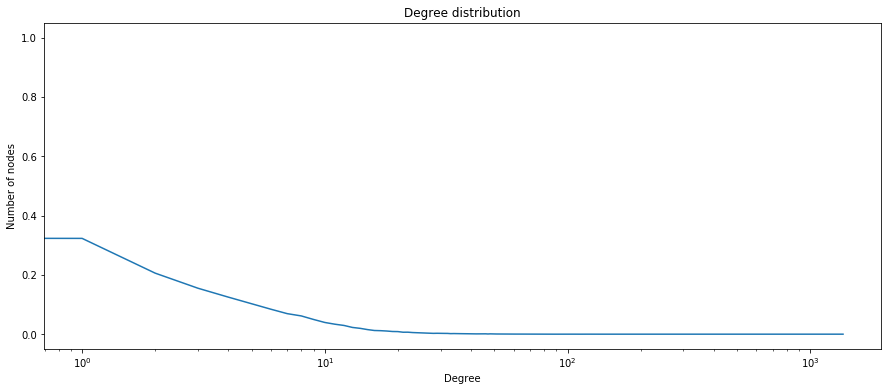

In [19]:
plt.figure(figsize = (15,6))
plt.plot(counter_supp)
plt.xscale('log')
plt.ylabel('Number of nodes')
plt.xlabel('Degree')
plt.title('Degree distribution')
plt.show()

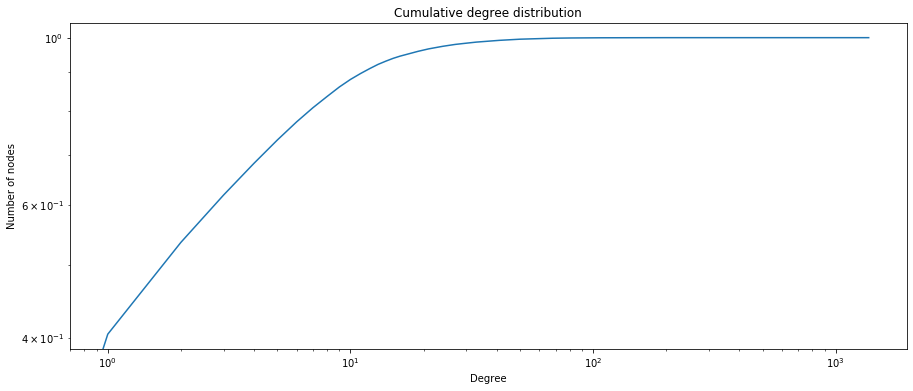

In [20]:
plt.figure(figsize = (15,6))
plt.plot(counter)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Number of nodes')
plt.xlabel('Degree')
plt.title('Cumulative degree distribution')
plt.show()

### In and out degree

In [21]:
in_d = [] 
for node in in_links.keys():
    in_d.append(len(in_links[node]))

in_degree = dict(zip(in_links.keys(), in_d)) # dictionary with in-degree

In [22]:
out_d = [] 
for node in out_links.keys():
    out_d.append(len(out_links[node]))

out_degree = dict(zip(out_links.keys(), out_d)) # dictionary with out-degree

### Creating the graph with Networkx

In [23]:
G = nx.DiGraph()

In [24]:
for row in dataset.iterrows():
    G.add_edge(row[1][0], row[1][1], capacity=1)

In [25]:
def add_categories(my_category, G):
    for i in my_category.keys():
        G.nodes[i]['category']=my_category[i]
    return G

In [26]:
add_categories(nodes_category, G)

## RQ2

In order to build the requested function we essentially used the explore function defined in the python file and then we adapted the output to the request. <br> In the following function we return indeed just the list of nodes visited in d clicks instead of the dictionary obtained from the explore function. 

In [27]:
'''This function works as the explore function defined in 'no_nx_functions', but with a different output format.'''
def get_articles(node,n_clicks):
    tree = f.explore(node_id,n_clicks,out_links)
    articles = []
    for d in tree.keys():
        articles+=tree[d]
    return articles

At this point we decide to select three different nodes with different out-degrees:


In [28]:
a = 108
out_degree.get(a)


3

In [29]:
b = 786913
out_degree.get(b)


268

In [30]:
c = 786773
out_degree.get(c)


39

Now we see how many articles each node can reach in a fixed number of clicks ( in our case 10) and then we will comment the results:

In [31]:
%%time
n_clicks = 10
node_id = a
articles = get_articles(node_id,n_clicks)
print('Number of articles reached within', n_clicks, 'from node', node_id,':', len(articles))

Number of articles reached within 10 from node 108 : 63217
Wall time: 32.8 s


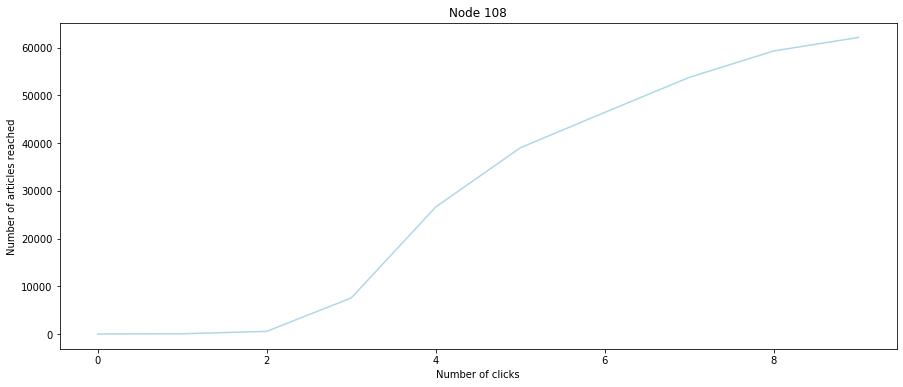

In [32]:
graph = []
for n_clicks in range(10):
    graph.append(len(get_articles(node_id,n_clicks)))
plt.figure(figsize = (15,6))
plt.plot(graph,color = 'lightblue');
plt.ylabel('Number of articles reached')
plt.xlabel('Number of clicks')
plt.title(f'Node {node_id}')
plt.show()

In [33]:
%%time
n_clicks = 10
node_id = b
articles = get_articles(node_id,n_clicks)
print('Number of articles reached within', n_clicks, 'from node', node_id,':', len(articles))

Number of articles reached within 10 from node 786913 : 6605
Wall time: 73.2 ms


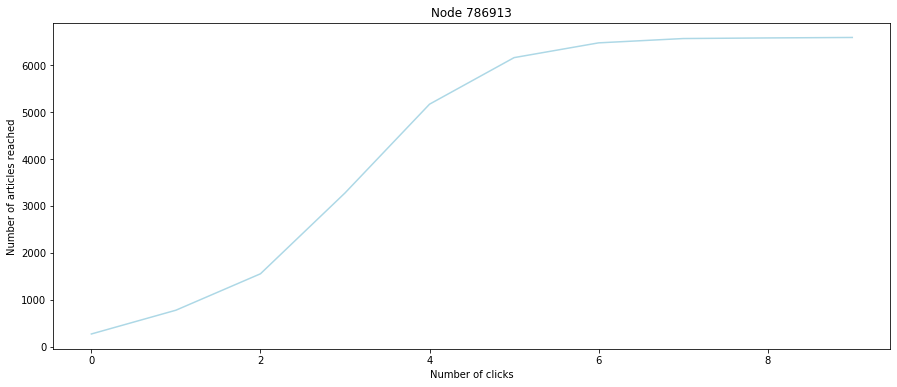

In [34]:
graph = []
for n_clicks in range(10):
    graph.append(len(get_articles(node_id,n_clicks)))
plt.figure(figsize = (15,6))
plt.plot(graph,color = 'lightblue');
plt.ylabel('Number of articles reached')
plt.xlabel('Number of clicks')
plt.title(f'Node {node_id}')
plt.show()

In [35]:
%%time
n_clicks = 10
node_id = c
articles = get_articles(node_id,n_clicks)
print('Number of articles reached within', n_clicks, 'from node', node_id,':', len(articles))

Number of articles reached within 10 from node 786773 : 6586
Wall time: 74.2 ms


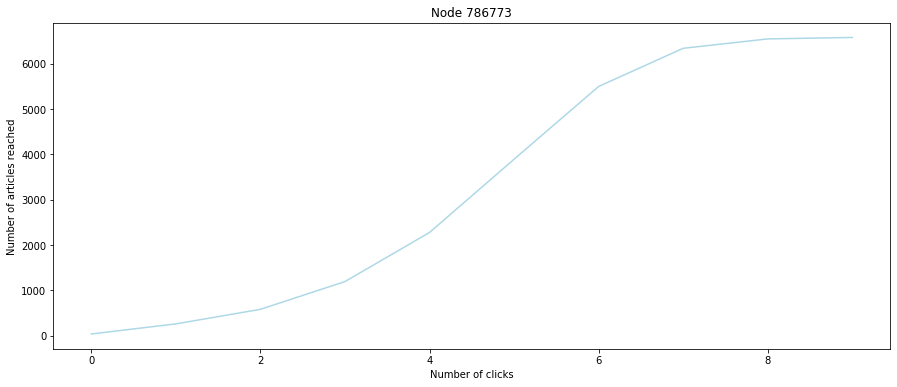

In [36]:
graph = []
for n_clicks in range(10):
    graph.append(len(get_articles(node_id,n_clicks)))
plt.figure(figsize = (15,6))
plt.plot(graph,color = 'lightblue');
plt.ylabel('Number of articles reached')
plt.xlabel('Number of clicks')
plt.title(f'Node {node_id}')
plt.show()

#### Comments on the obtained results: <br>
We have analyzed three different nodes that have out-degree equal to 3, 268 and 39. <br>
We can see that the trend of the curves are different: in the second and in the third case the curve tends to a certain value after some clicks while in the first case the curve seems to have an increasing trend even after 10 clicks. <br> So even if the first node is the one with the lowest out-degree, it is the node that can reach the highest number of nodes after a few clicks. That could be because it is like a hub that is linked to many nodes with high out-degree while the others two considered nodes are probably linked to nodes with low out-degree. <br> Finally we can say that starting the exploration from a node with high out-degree, does not mean to reach more nodes than starting from a node with lower out-degree.

### RQ3

First of all we have decided to visualize the number of categories with grade equal to n where n is the number of nodes belonging to it. <br> So we build a dictionary where the key is the grade and the value is the number of the categories with that grade.

In [37]:
# Creating the list of the grades for each category
abc = list(category_nodes.values())
counter = []
for elem in abc:
    counter.append(len(elem))

In [38]:
# Building the dictionary where, for each element of the set, we count the occurrencies and then we assign them to the grade
num_of_cat_nodes = {}
for elem in set(counter):
    num_of_cat_nodes[elem] = counter.count(elem)
    

In [39]:
# Transforming the dictionary to a DataFrame in order to easily plot it
df_forplot = pd.Series(num_of_cat_nodes).to_frame()
df_final = df_forplot.reset_index()
df_final.columns = ['Grade of category', 'Number of categories']
final_df = df_final.sort_values(by=['Grade of category'], ascending=True)
final_df.head(70)

,Grade of category,Number of categories
0,1,1413
1,2,750
2,3,468
3,4,333
4,5,223
...,...,...
65,67,4
66,68,2
67,69,3
68,70,2


In [40]:
'''This function is used just to plot the exact value near every bar in the histogram plot'''
def plot_values_in_barh(y):
    for index, value in enumerate(y):
        plt.text(value, index, str(round(value, 2)))

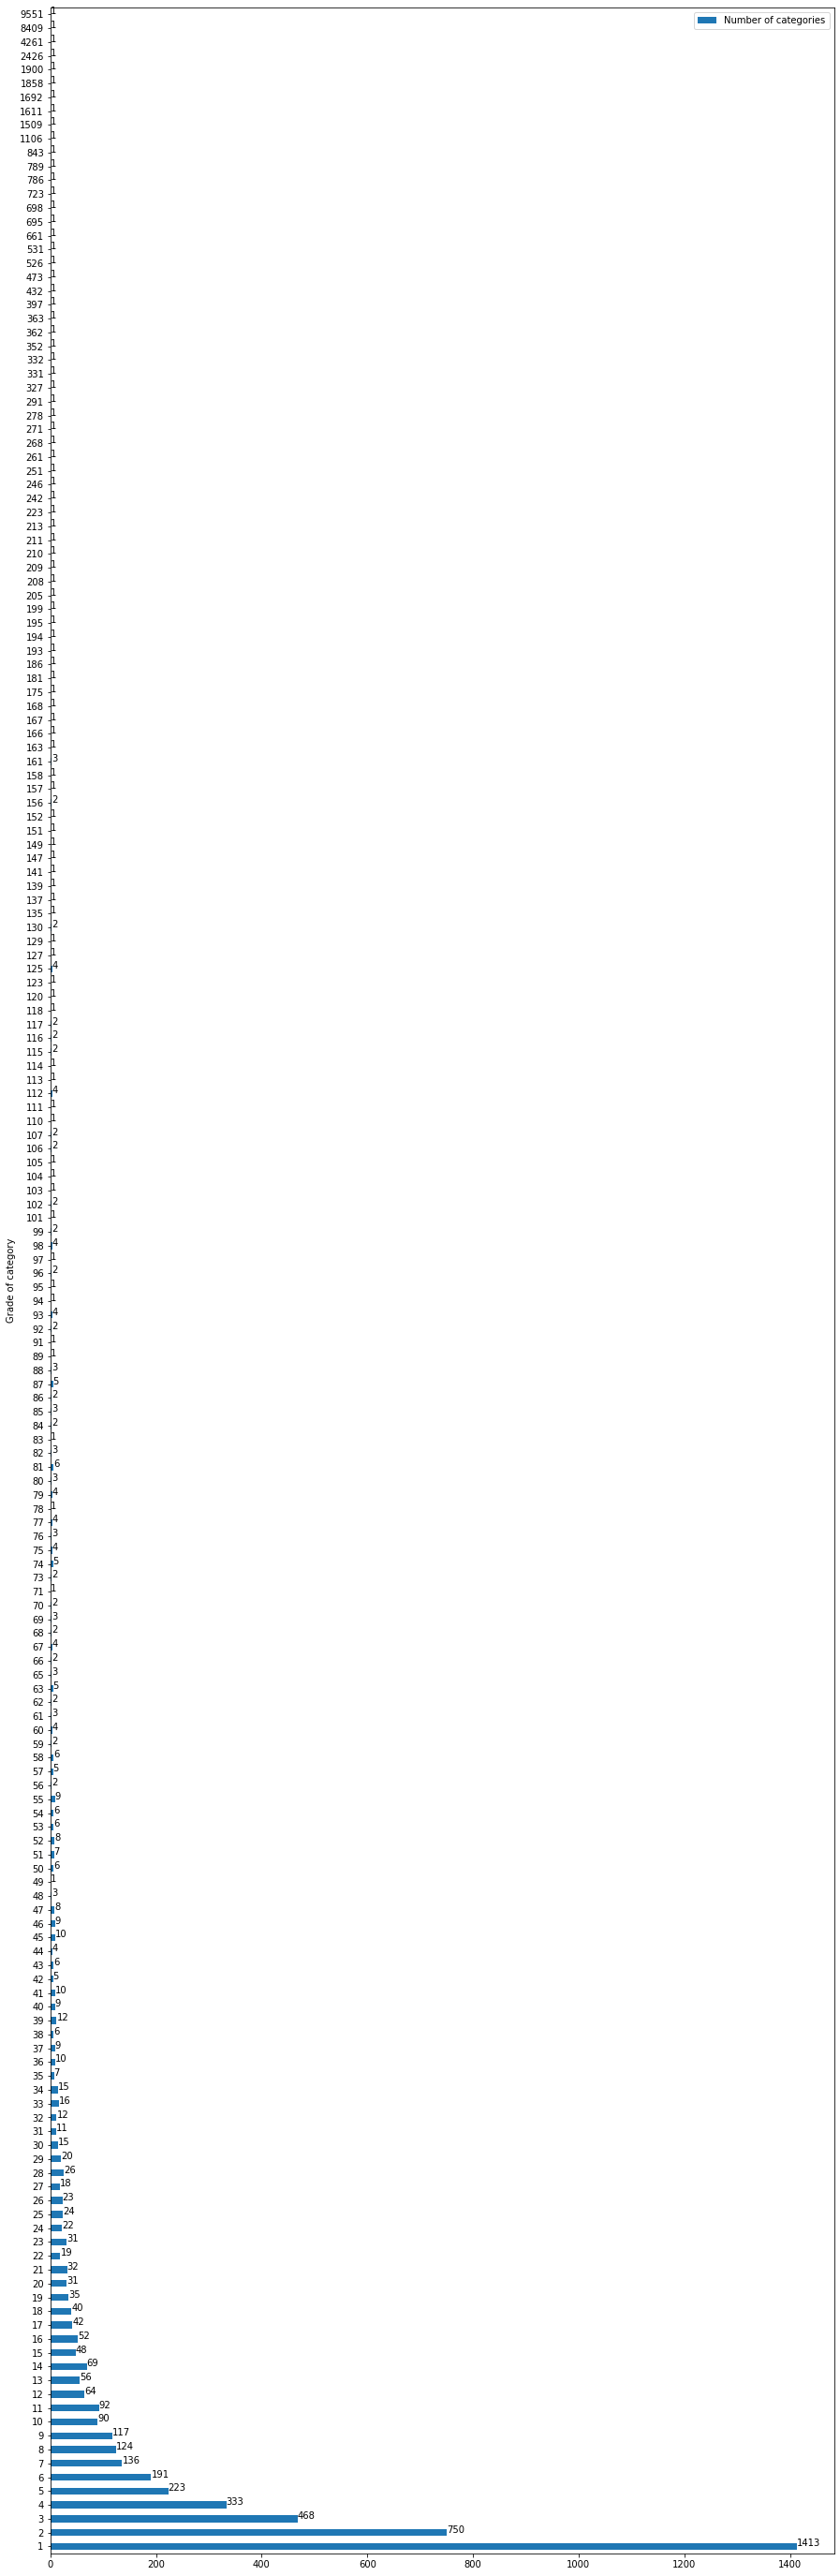

In [41]:
# Visualizing the number of categories with that grade
ax = final_df.plot.barh(x='Grade of category', y='Number of categories', figsize = (15,50))
plot_values_in_barh(list(final_df['Number of categories']))

In [42]:
# Visualizing the average size of a category in our network
statistics.mean(final_df['Number of categories'])

27.331521739130434

After this analysis we have thought to build a heuristic function that works in accetable time for the majority of categories.

#### Comments on the defined function :

Since the problem’s complexity is high we have decided to implement a function which finds a good trade off between accuracy and speed.
Our function consists mainly in three steps: <br>
1. **Initial checks** : 
    - Retrieve set of nodes in C
    - At most one node with outdegree 0
    - Stop when finished or stucked in a cycle
    
    
2. **Criteria for choosing nodes** :
    - Maximize the number of nodes of interest visited in one iteration 
    - Pick the node with the greatest outdegree
    - Minimize the path 
    
    
3. **Final step** :
    - Concatenate the paths of every step
    - Return the minimum number of clicks required to reach all pages in p

    

Here an example of a not connected graph:

In [43]:
%%time
random.seed(42)
res = f.visit_all('Genoa_C.F.C._players', category_nodes, in_links, out_links)
print(res)

Nodes to visit [88731]
Center is node 93271 with indegree 1
Nodes {88731} cannot be reached from node 93271
Not possible
Wall time: 1.95 ms


Here an example of a connected graph:

In [55]:
%%time
random.seed(21)
res = f.visit_all('Deaths_from_diabetes', category_nodes, in_links, out_links)
print(res)

Nodes to visit [573108, 1163624, 1163632, 1166750]
Center is node 573108 with indegree 148
Nodes to visit 3
No out-link from 573108
No out-link from 573108
No out-link from 573108
Cannot reach 1163632
Not possible
Wall time: 28.3 s


In [50]:
len(res[0])

1

In [51]:
# Creating a dictionary where for each node we assign the corresponding color
no = set(res[0]) - set(res[1])
yes = set(res[1])
c = set([res[1][-1]])
no_col = ['black']*len(no)
yes_col = ['green']*len(yes)
c_col = ['red']
a = dict(zip(no,no_col))
b = dict(zip(yes,yes_col))
c = dict(zip(c,c_col))
a.update(b)
a.update(c)

In [52]:
# Building the graph of the analyzed category 
reduced_graph = G.copy()
for i in list(G.nodes):
    if i in a.keys():
        pass
    else:
        reduced_graph.remove_node(i)
color_map =[]
for node in reduced_graph:
    color_map.append(a[node])


At this point we show the graph where:
- RED node is the central node
- GREEN nodes belong to the set of pages we are considering
- BLACK nodes are the one we pass through but we do not consider in the category

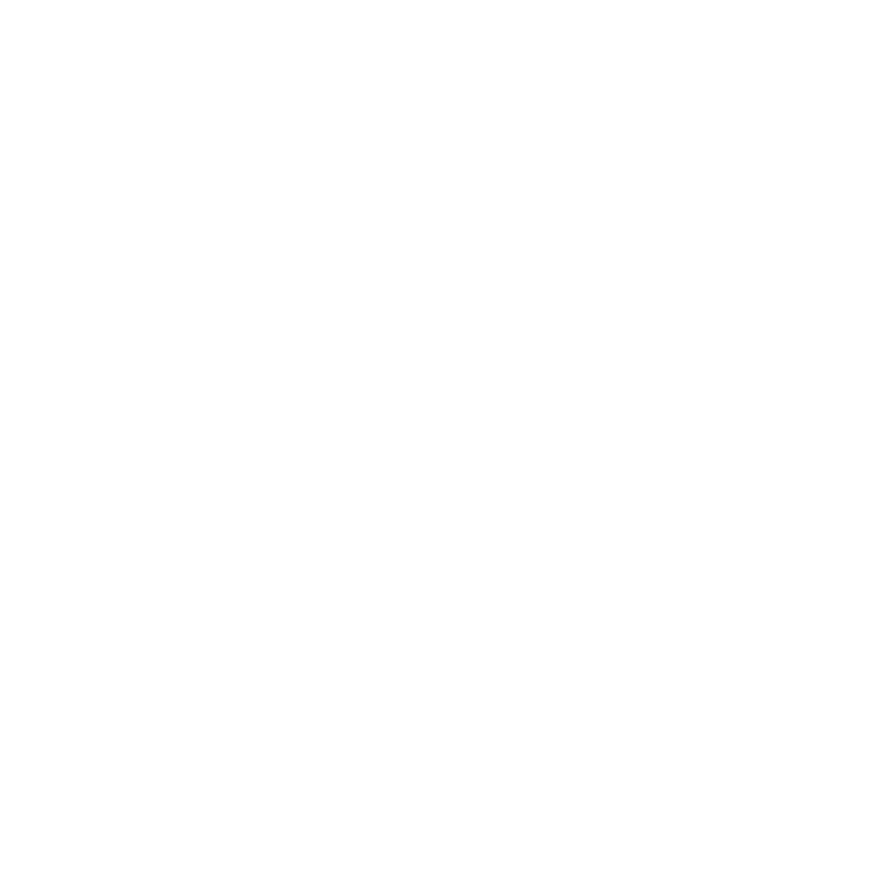

In [53]:
plt.figure(1, figsize=(12,12))
nx.draw(reduced_graph, node_color = color_map, with_labels=False, edge_color='gray', verticalalignment='bottom', font_size = 20)
plt.show()

## RQ4

Given in input two categories: C1 and C2, we get the subgraph induced by all the articles in the two categories.

- Let v and u two arbitrary pages in the subgraph. What is the minimum set of hyperlinks one can remove to disconnect u and v?

#### Make the graph undirected

In [54]:
H = G.to_undirected()

#### Given in input two categories: C1 and C2, we get the subgraph induced by all the articles in the two categories.

In [55]:
def get_subgraph(G, c1, c2):
    new_graph = G.copy()
    for i in list(new_graph.nodes):
        if new_graph.nodes[i]['category']!=c1 and new_graph.nodes[i]['category']!=c2:
            new_graph.remove_node(i)
    return new_graph

In [56]:
H = get_subgraph(H, 'American_television_actors', 'Films_based_on_novels')
H.number_of_edges()

721

The following solution is based on the Max-Flow Min-Cut method.

### Simple Min-Cut
    1. Chose one path from u to v
    2. Remove all edges of the path
    3. Repeat 1 and 2 until there's no path
    4. return the number of path found
### Augmented Simple Min-Cut
    1. if u and v are the same node -> return 'same node'
    2. if deg of u or v is 1 or 0 -> return 1 or 0
    3. paths = call find_paths to calculate different paths
    4. if paths have just one path -> return 1
    5. use simple_min_cut for each path in paths
    6. return the max of the min cuts
### Find Paths
    1. Find the shortest path
    2. Remove a random edge of the s.p. from the graph
    3. Repeat 1-2 until there are no paths
    
#### Observations:
    1. For this case the simple_min_cut has the best trade-off between Speed-Accuracy.
    2. The Augmented Min-Cut is more accurate.
    3. Let m the Min-Cut, u and v two nodes of the Graph G, we have:
$$m \in [0, max(deg(u), deg(v))]$$

In [57]:
subgraph = H.copy()

#### Random Choice

In [58]:
def find_two_random_nodes(g):
    while True:
        u = random.choice(list(g.nodes()))
        v = random.choice(list(g.nodes()))
        try:
            sp = nx_f.shortest_path(g, u, v)
            min_cut = nx_f.simple_min_cut(g, u, v, sp)
            return u,v
        except:
            continue

In [59]:
u,v = find_two_random_nodes(subgraph)
u,v

(1775389, 803817)

In [60]:
%%time
sp = nx_f.shortest_path(subgraph, u, v)
nx_f.simple_min_cut(subgraph, u, v, sp)

Wall time: 12.7 ms


1

In [61]:
%%time
nx_f.augmented_min_cut(subgraph, u, v)

Wall time: 0 ns


1

In [62]:
%%time
nx_f.augmented_min_cut(subgraph, u, v)

Wall time: 0 ns


1

In [63]:
%%time
cut_value = nx.minimum_cut(subgraph, u, v)[0]
cut_value

Wall time: 39 ms


1

#### Exemple 1

In [64]:
u=1061503
v=1165662

In [65]:
%%time
sp = nx_f.shortest_path(subgraph, u, v)
nx_f.simple_min_cut(subgraph, u, v, sp)

Wall time: 12.7 ms


3

In [66]:
%%time
nx_f.augmented_min_cut(subgraph, u, v)

Starter Paths:  [[1061503, 1165303, 1165662], [1061503, 1165374, 1165662], [1061503, 1165374, 1165324, 1165303, 1165662], [1061503, 1163674, 1163615, 1163761, 1065580, 1165662], [1061503, 1163664, 1163731, 1163736, 1165344, 1165303, 1165662], [1061503, 1165203, 1165155, 1165469, 1165225, 1165303, 1165662]]
All min-cut:  [3, 3, 3, 3, 3, 3]
Wall time: 106 ms


3

In [67]:
%%time
cut_value = nx.minimum_cut(subgraph, u, v)[0]
cut_value

Wall time: 343 ms


3

### Visualization of find_path
nodes:

    u = 1061503
    v = 1165662

In [68]:
a = nx_f.find_paths(subgraph, u, v)

In [69]:
b = []
for i in a:
    for j in i:
        b.append(j)
b = set(b)

In [70]:
reduced_graph = subgraph.copy()
for i in list(subgraph.nodes):
    if i in b:
        pass
    else:
        reduced_graph.remove_node(i)

In [71]:
node_sizes = [20*len(reduced_graph.edges(n)) for n in reduced_graph.nodes()]

color_map = []
for node in reduced_graph:
    if node == u or node == v:
        color_map.append('red')
    else: 
        color_map.append('green')

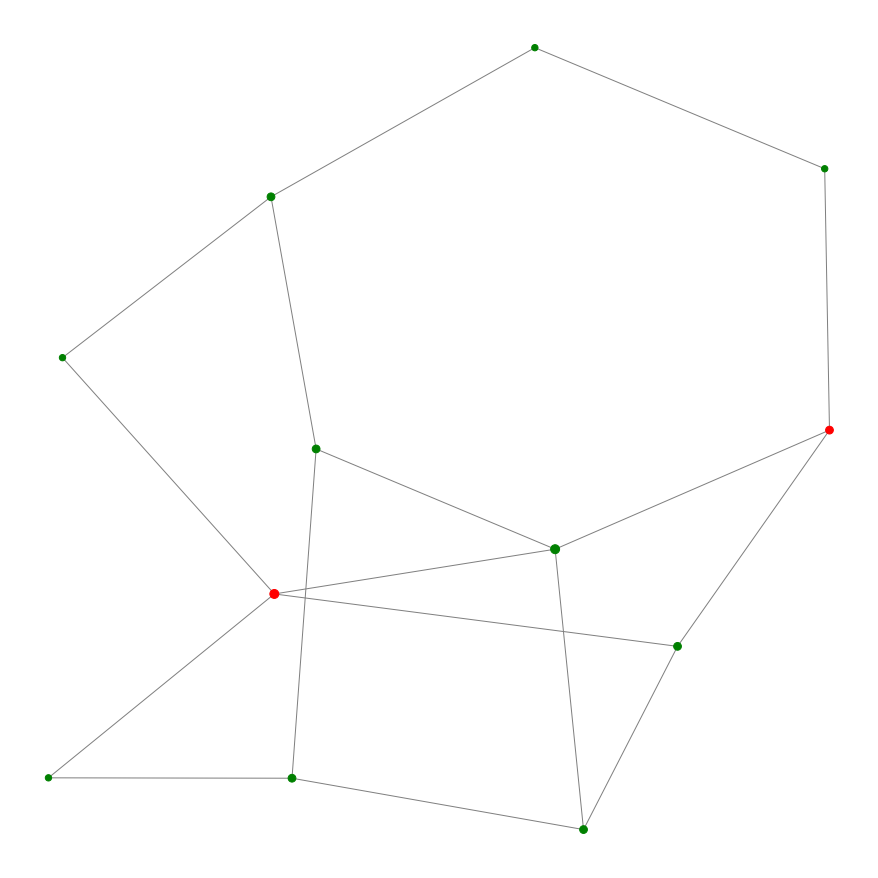

In [72]:
plt.figure(1, figsize=(12,12))
nx.draw_kamada_kawai(reduced_graph, node_size=(node_sizes), node_color=color_map, with_labels=False, edge_color='gray') 
#--> verticalalignment='bottom', font_size = 10
plt.show()

## Why Augmented Min Cut

In [73]:
my_g = nx.Graph()

In [74]:
my_g.add_edge(1, 2)
my_g.add_edge(2, 3)
my_g.add_edge(3, 4)
my_g.add_edge(2, 5)
my_g.add_edge(5, 6)
my_g.add_edge(6, 7)
my_g.add_edge(7, 4)
my_g.add_edge(4, 3)
my_g.add_edge(1, 8)
my_g.add_edge(8, 9)
my_g.add_edge(9, 10)
my_g.add_edge(10, 11)
my_g.add_edge(11, 3)

In [75]:
my_g = my_g.to_undirected()

In [76]:
my_color_map = []
for node in my_g:
    if node == 1 or node == 4:
        my_color_map.append('yellow')
    else: 
        my_color_map.append('orange')

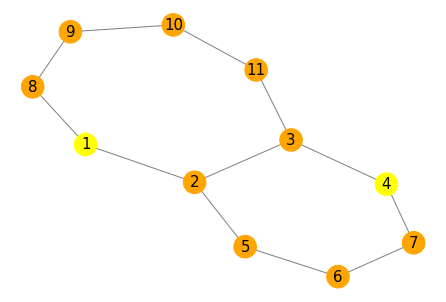

In [77]:
nx.draw(my_g, node_size=510, node_color=my_color_map, with_labels=True, verticalalignment='center', font_size = 15, edge_color='gray')

In [78]:
%%time
sp_e = nx_f.shortest_path(my_g, 1, 4)
nx_f.simple_min_cut(my_g, 1, 4, sp_e)

Wall time: 0 ns


1

In [79]:
%%time
nx_f.augmented_min_cut(my_g, 1, 4)

Starter Paths:  [[1, 2, 3, 4], [1, 2, 5, 6, 7, 4], [1, 8, 9, 10, 11, 3, 4]]
All min-cut:  [1, 2, 2]
Wall time: 0 ns


2

This was an example of how the "augmented simple min cut" helps us to find the correct answer.

## RQ5

For this task we will use a function that, given a category name in input ($C_0$), will return the shortest path from $C_0$ to any other category in the graph. According to our interpretation of the task, we should not consider the path from the destination category ($C_i$) to $C_0$, rather we should only consider the path from nodes in $C_0$ to $C_i$. Consequently, even if two nodes ($n_0$ $\in$ $C_0$ and ni $\in$ $C_i$) are not disconnected, we will still assume they are if a directional path from $n_0$ to $n_i$ does not exist.

In our function *categories_distance* we follow these steps:
  1. we consider the exploration tree of each node in $C_0$ thorugh the *exploration* function peviously defined.
  2. for each category $C_i$, we save the shortest path between any node in $C_0$ and $C_i$. 
  3. we take the median for each category. 

In order to keep as much information as possible, we decided to convert "infinite" distances between two nodes with a finite number. This finite number is not fixed, but depends on the maximum distance with which, starting from $n_0$, any connected node can be reached. In other words, we will describe the "disconnected" case as the maximum distance between $n_0$ and any connected node + 1. In this way we are sure that we are not changing the ranking, but at the same time we will avoid to return "None" as a distance between two categories that are, in reality, not disconnected. The final result will exclude categories that are completely disconnected from $C_0$.

In [80]:
%%time
c0 = 'Olympic_footballers_of_Spain'
d = f.categories_distance(c0, category_nodes, out_links)
print('Number of nodes in category:',len(category_nodes[c0]))
print('Percentage of categories reached: ',round((len(d)/len(category_nodes))*100,2),'%')

Number of nodes in category: 5
Percentage of categories reached:  75.23 %
Wall time: 5min 28s


Here we provide an example with the category *Naturalised_citizens_of_the_United_Kingdom*. We can see that this category is connected to the 76% of the total number of categories in th graph. In the plot below we show the closest 20 categories to the input one. 

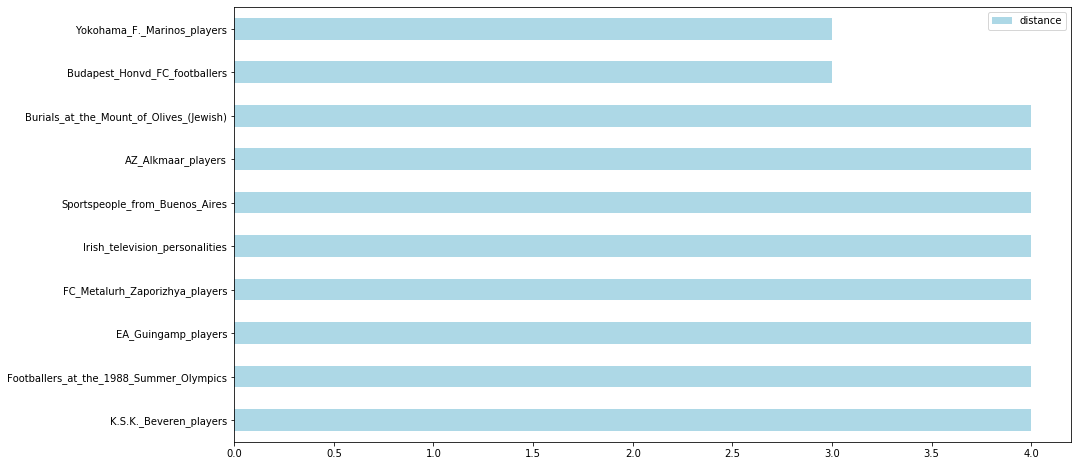

In [81]:
df_rq5 = pd.DataFrame(d, index = ['distance']).T
df_rq5.head(10).sort_values(by = 'distance', ascending = False).plot.barh(figsize = (15,8),color = 'lightblue');

Here we provide a more general overview of the distance ditribution of the categories. We can obeserve that from the category *Naturalised_citizens_of_the_United_Kingdom* we reach over half of the connected categories within 10 clicks. A peculiar aspect of this distribution is that is is not uniform, more specifically we can notice that there are three "clusters". We may address this peculiar feature to the fact that, when one node in a category ($C_0$) has a greater distance from another node in a different category ($C_i$), also all the other nodes in $C_0$ are more likely to be at a greater distance from any node in $C_i$.

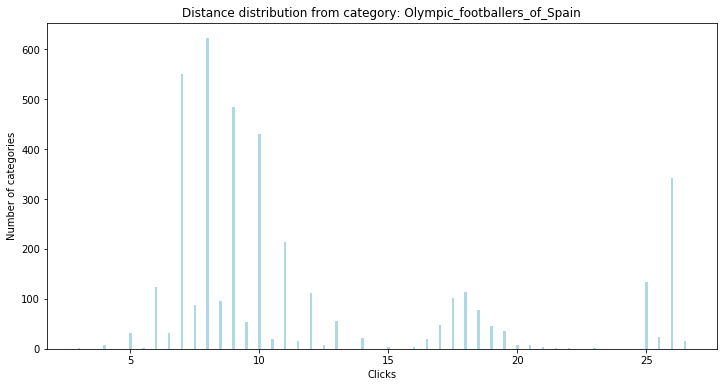

In [82]:
distances = list(d.values())
dist_plot = []
for dist in set(distances):
    dist_plot.append(distances.count(dist))
plt.figure(figsize=(12,6))
plt.bar(list(set(distances)),dist_plot,color = 'lightblue',width = 0.1);
plt.ylabel('Number of categories')
plt.xlabel('Clicks')
plt.title(f'Distance distribution from category: {c0}')
plt.show()

Since the category *Olympic_footballers_of_Spain* is connected to over 75% of the categories in the graph, we may assume that this distance distribution is actually giving a picture of how the graph is organized. In order to verify this hypothesis, we pick other two categories and check their distance distribution. \
We now consider *American_female_adult_models* and *Broadway_plays*. We can see thatn *Broadway_plays* is connected to less categories than the other two, laso it is not connected to the third cluster. However, we can observe how the distribution is really similar among the three categories which may confirm the division of our graph in at list 3 connected components and also that these three categories all belong to the most populated one.

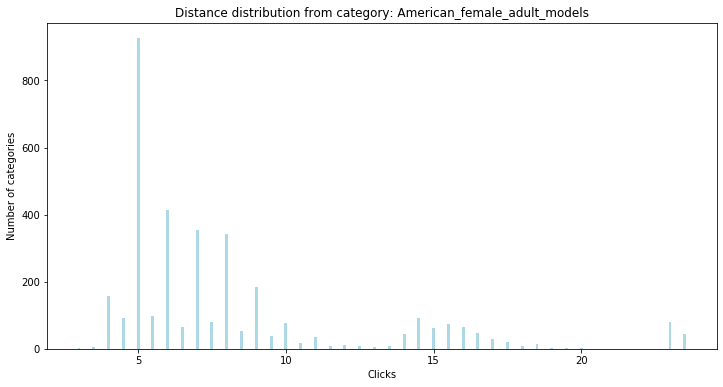

In [83]:
c0 = 'American_female_adult_models'
d = f.categories_distance(c0, category_nodes, out_links)
distances = list(d.values())
dist_plot = []
for dist in set(distances):
    dist_plot.append(distances.count(dist))
plt.figure(figsize=(12,6))
plt.bar(list(set(distances)),dist_plot,color = 'lightblue',width = 0.1);
plt.ylabel('Number of categories')
plt.xlabel('Clicks')
plt.title(f'Distance distribution from category: {c0}')
plt.show()

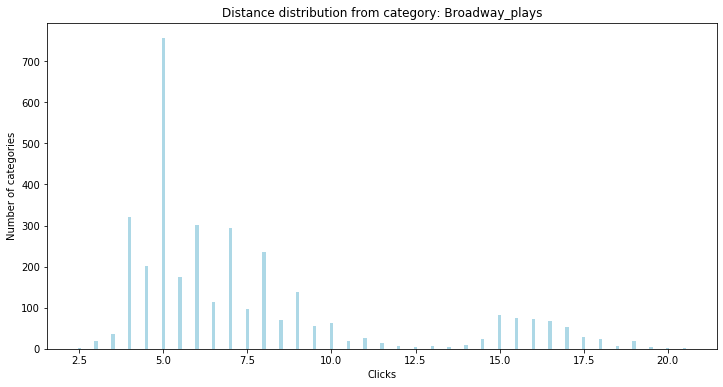

In [84]:
c0 = 'Broadway_plays'
d = f.categories_distance(c0, category_nodes, out_links)
distances = list(d.values())
dist_plot = []
for dist in set(distances):
    dist_plot.append(distances.count(dist))
plt.figure(figsize=(12,6))
plt.bar(list(set(distances)),dist_plot,color = 'lightblue',width = 0.1);
plt.ylabel('Number of categories')
plt.xlabel('Clicks')
plt.title(f'Distance distribution from category: {c0}')
plt.show()

## RQ6
To complete this task we will, at first, transform our graph into one which has the nodes' categories as nodes. In short, for each category we merge the sets of nodes associated to any of the nodes of that category. In order to keep all the information from the previous graph we decided to transform our unweighted graph to a weighted one. The weight will be the number of nodes that have in/out links from/to another category. We provide an example of the graph structure below.

In [85]:
in_links_cat = f.transform(in_links, category_nodes, nodes_category)
out_links_cat = f.transform(out_links, category_nodes, nodes_category)

We implemented the *random walk* version of the pagerank algorithm with a probabilistic approach. Since the importance of a web page can be measured by how many incoming links it has, we can see the importance of page as the probability that a random surfer on the Internet opens any page. We can interpret the weights in a probabilistic way, meaning that a greater weight increases the probability that the surfer will visit a certain page. We can model the process as a random walk on graphs. \
At the beginning, each page has equal probability to be chosen as a starting point. So, the initial probability is given by a vector which has all values $\frac{1}{n°nodes}$. The probability that page i will be visited after k steps is equal to its ranking score after k iterations. How do we determine the ranking score on a node N1 at iteration k? 
- For each node (N1) we check which nodes have an outlink to this node; 
- For each of these nodes (N2) we calculate the probability of N1 to receive a node from N2 and multiply it by the ranking score of N2 of the previous iteration, more specifically the probability that N1 recieves a link from N2 is: 
    $P_{N2} = \frac{W_{N2}}{\sum_{i=1}^{In} W_i}$
    where *In* is the number of in-links of N1 and $W_i$ is the weight of each in-link of N1.
- The score of N1 at a given iteration will be $\sum_{i=1}^{In} P_{Ni}$

Wall time: 1min 8s


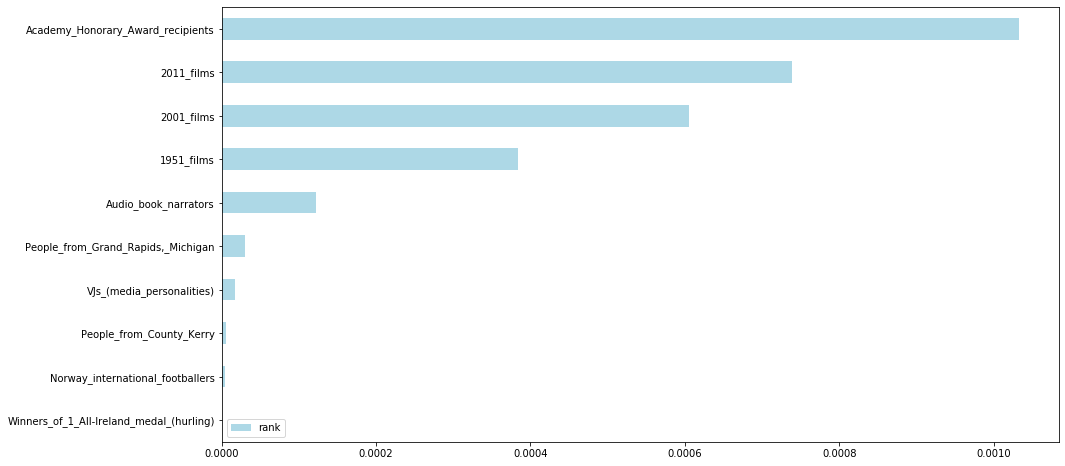

In [86]:
%%time
rank = f.pagerank(10, in_links_cat, out_links_cat)
df_rq6 = pd.DataFrame(rank, index = ['rank']).T
df_rq6.head(10).sort_values(by = 'rank', ascending = True).plot.barh(figsize = (15,8),color = 'lightblue');

Wall time: 11min 27s


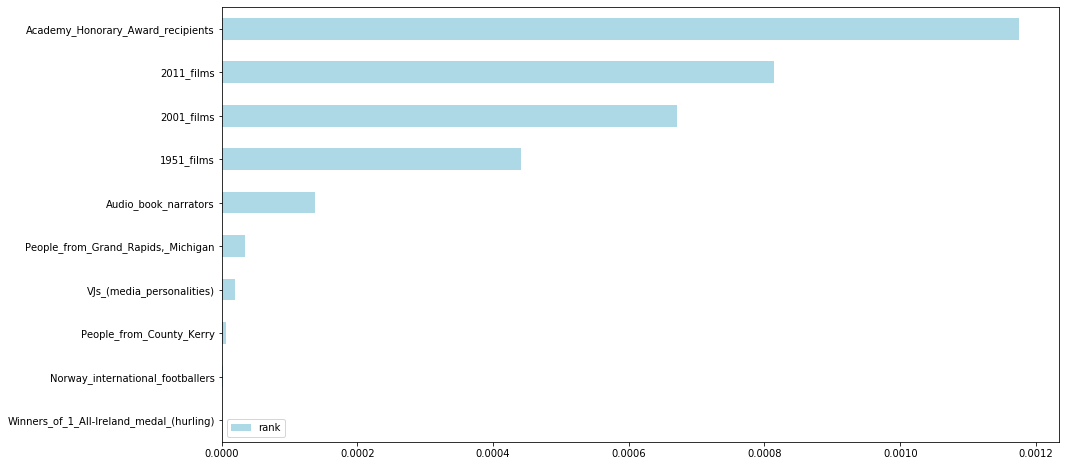

In [87]:
%%time
rank = f.pagerank(100, in_links_cat, out_links_cat)
df_rq6 = pd.DataFrame(rank, index = ['rank']).T
df_rq6.head(10).sort_values(by = 'rank', ascending = True).plot.barh(figsize = (15,8),color = 'lightblue');

We compared the ranking of the graph categories after 10 and 100 iterations. As we can see from the barplots above, the ranking that we get after 100 iteration is the same that we already had after 10 iterations, which is quite typical of sparse graphs. What changes between the two cases is the score assigned to each category, which we can assume to be a more accurate approximation after 100 iteration rather than 10. 